In [1]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
ptv_result = [0] * 9

In [4]:
with open(f'ptv_cbi_q_10.pickle', mode='rb') as fp:
    ptv_result[0] = pickle.load(fp)
with open(f'ptv_cbi_q_20.pickle', mode='rb') as fp:
    ptv_result[1] = pickle.load(fp)
with open(f'ptv_cbi_q_30.pickle', mode='rb') as fp:
    ptv_result[2] = pickle.load(fp)
with open(f'ptv_rbi_q_10_1.pickle', mode='rb') as fp:
    ptv_result[3] = pickle.load(fp)
with open(f'ptv_rbi_q_10_2.pickle', mode='rb') as fp:
    ptv_result[4] = pickle.load(fp)
with open(f'ptv_rbi_q_20_1.pickle', mode='rb') as fp:
    ptv_result[5] = pickle.load(fp)
with open(f'ptv_rbi_q_20_2.pickle', mode='rb') as fp:
    ptv_result[6] = pickle.load(fp)
with open(f'ptv_rbi_q_30_1.pickle', mode='rb') as fp:
    ptv_result[7] = pickle.load(fp)
with open(f'ptv_rbi_q_30_2.pickle', mode='rb') as fp:
    ptv_result[8] = pickle.load(fp)

In [5]:
for i in range(9):
    ptv_result[i]['r'] = np.sqrt(ptv_result[i]['x']**2 + ptv_result[i]['y']**2)

In [6]:
px2mm = 1000 / np.sqrt((498 - 488)**2 + (391 - 646)**2)
fps = 25

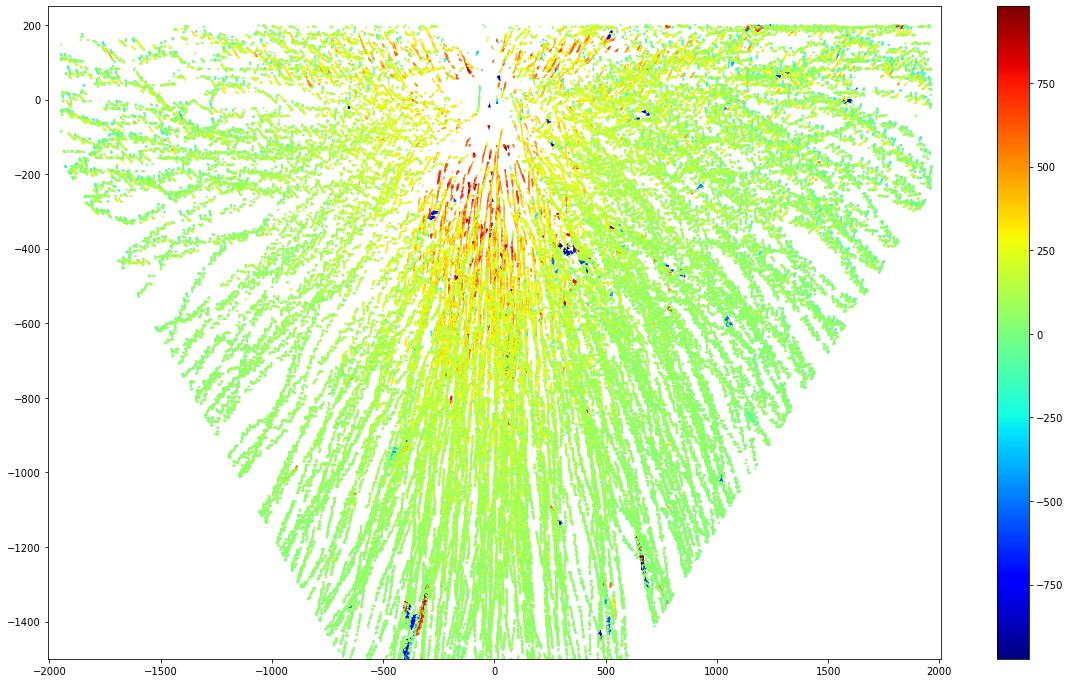

In [7]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(-512*px2mm, 512*px2mm)
plt.ylim(-1500, 250)
c = ax.quiver(ptv_result[0]['x']*px2mm, ptv_result[0]['y']*px2mm, ptv_result[0]['dx']*px2mm * fps, ptv_result[0]['dy']*px2mm * fps, ptv_result[0]['dr']*px2mm * fps, cmap="jet")
fig.colorbar(c)
plt.show()

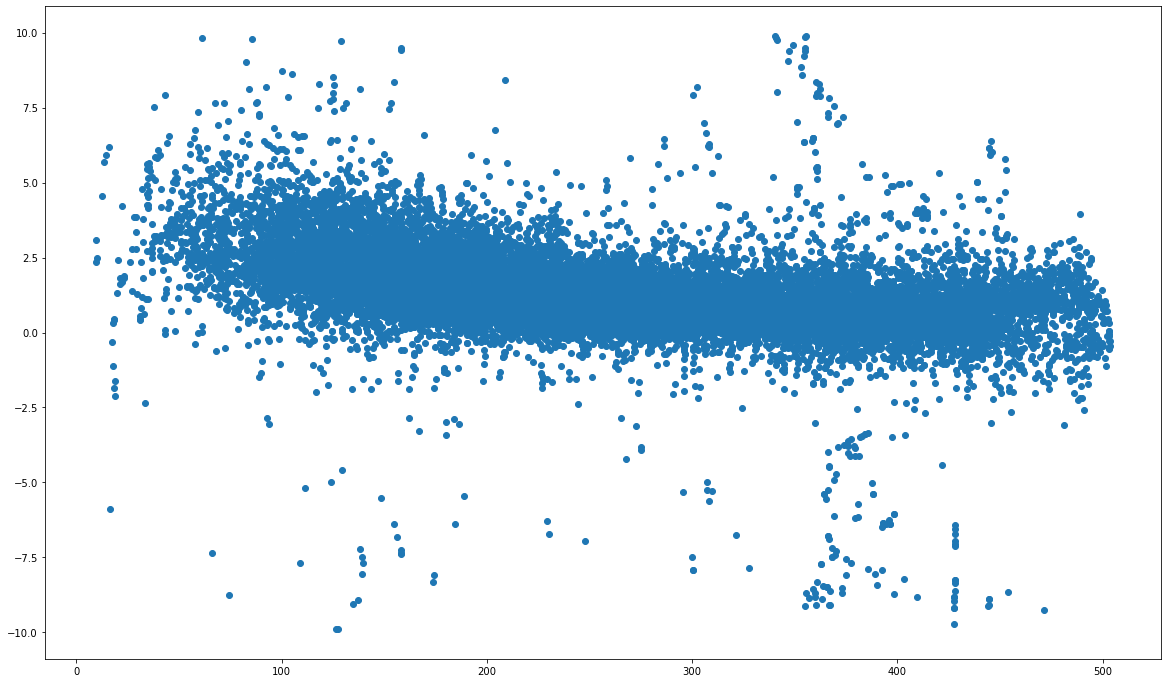

In [8]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(ptv_result[0]['r'][::10], ptv_result[0]['dr'][::10])
plt.show()

In [9]:
ptv_result[0]['r'].max()*px2mm

1973.8469844976996

In [10]:
res_sort = [0] * 9

for i in range(9):
    res_sort[i] = ptv_result[i].sort_values(by='r', ascending=True).values

In [11]:
_iter = 50
res = [0]*9
res2 = [0]*9

In [ ]:
for c in range(9):
    r_dr_err = np.zeros((5001, 3))
    r_dr_in = np.zeros((1, 2))
    r_dr_err[:, :] = np.nan
    r_dr_in[:, :] = np.nan

    for i in tqdm(range(0, 5001, _iter)):
        res_sort_l = res_sort[c][np.where(res_sort[c][:, 4] >= i/10)]
        res_sort_lr = res_sort_l[np.where(res_sort_l[:, 4] < (i+_iter)/10)]
        columns = ['x', 'y', 'dx', 'dy', 'r', 'theta', 'dr']
        df = pd.DataFrame(data=res_sort_lr, columns=columns, dtype='float')
        q1 = df['dr'].quantile(0.25)
        q2 = df['dr'].quantile(0.75)
        iqr = q2 - q1

        upper = q2 + 1.5 * iqr
        bottom = q1 - 1.5 * iqr
        _in = df[(df['dr'] >= bottom) & (df['dr'] <= upper)].values
        tmp = np.array([_in[:, 4], _in[:, 6]]).T
        r_dr_in = np.vstack([r_dr_in, tmp])

        r_dr_err[i, 0] = i
        r_dr_err[i, 1] = np.mean(tmp, axis=0)[1]
        r_dr_err[i, 2] = np.std(tmp, axis=0)[1]

    r_dr_err = r_dr_err[::_iter]
    res[c] = r_dr_err
    res2[c] = r_dr_in

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.errorbar(res[0][:, 0]*px2mm/10, res[0][:, 1]*px2mm*fps, yerr=res[0][:, 2]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps)
ax.scatter(res[1][:-25, 0]*px2mm/10, res[1][:-25, 1]*px2mm*fps)
ax.scatter(res[2][:-25, 0]*px2mm/10, res[2][:-25, 1]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.errorbar(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps, yerr=res[0][:-25, 2]*px2mm*fps)
ax.errorbar(res[1][:-25, 0]*px2mm/10, res[1][:-25, 1]*px2mm*fps, yerr=res[1][:-25, 2]*px2mm*fps)
ax.errorbar(res[2][:-25, 0]*px2mm/10, res[2][:-25, 1]*px2mm*fps, yerr=res[2][:-25, 2]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.errorbar(res[0][:-25, 0]*px2mm/10, res[0][:-25, 1]*px2mm*fps, yerr=res[0][:-25, 2]*px2mm*fps)
ax.errorbar(res[3][:-25, 0]*px2mm/10, res[3][:-25, 1]*px2mm*fps, yerr=res[3][:-25, 2]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.errorbar(res[1][:-25, 0]*px2mm/10, res[1][:-25, 1]*px2mm*fps, yerr=res[1][:-25, 2]*px2mm*fps)
ax.errorbar(res[5][:-25, 0]*px2mm/10, res[5][:-25, 1]*px2mm*fps, yerr=res[5][:-25, 2]*px2mm*fps)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.errorbar(res[2][:-25, 0]*px2mm/10, res[2][:-25, 1]*px2mm*fps, yerr=res[2][:-25, 2]*px2mm*fps)
ax.errorbar(res[7][:-25, 0]*px2mm/10, res[7][:-25, 1]*px2mm*fps, yerr=res[7][:-25, 2]*px2mm*fps)
plt.show()

In [ ]:
H, R, T = 900, 2700, 1.0

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
# plt.ylim(0, 0.1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/2.2087, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/2.2087, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/2.2087, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.errorbar(res[0][:-25, 0]*px2mm/10/H, res[0][:-25, 1]*px2mm*fps/H*T, yerr=res[0][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[1][:-25, 0]*px2mm/10/H, res[1][:-25, 1]*px2mm*fps/H*T, yerr=res[1][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[2][:-25, 0]*px2mm/10/H, res[2][:-25, 1]*px2mm*fps/H*T, yerr=res[2][:-25, 2]*px2mm*fps/H*T)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
plt.show()
# fig.savefig("rbi_10.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
plt.show()
# fig.savefig("rbi_20.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi_30.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# plt.xlim(0, 1)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/R, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/R, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/R, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
plt.show()
# fig.savefig("cbi2.png")

In [ ]:
r = np.linspace(0.03, 0.35, 1000)
q = np.array([17, 33, 50]) * 1e-5
a = -20.31705621 * q
b = 3.50144227e2 * q + 1.39603360e-2
c = np.array([-0.055, -0.055, -0.055])
y0 = a[0] * r**-2 + b[0] * r**-1 + c[0]
y1 = a[1] * r**-2 + b[1] * r**-1 + c[1]
y2 = a[2] * r**-2 + b[2] * r**-1 + c[2]

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel(r"$r$ [m]", fontsize=32)
plt.ylabel(r"$v_{r}$ [m/s]", fontsize=32)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.xlim(0, 1)
plt.ylim(0, 820)

ax.plot(r/R*1000, y0*1000, linewidth=5, c='b', linestyle='dashed')
ax.plot(r/R*1000, y1*1000, linewidth=5, c='g', linestyle='dashed')
ax.plot(r/R*1000, y2*1000, linewidth=5, c='r', linestyle='dashed')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# plt.xlim(0, 1.0)
plt.ylim(0, 0.82)
ax.scatter(res[0][1:-25, 0]*px2mm/10/R, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
# plt.ylim(0, 0.1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/2.2087, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/2.2087, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/2.2087, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.errorbar(res[0][:-25, 0]*px2mm/10/H, res[0][:-25, 1]*px2mm*fps/H*T, yerr=res[0][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[1][:-25, 0]*px2mm/10/H, res[1][:-25, 1]*px2mm*fps/H*T, yerr=res[1][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[2][:-25, 0]*px2mm/10/H, res[2][:-25, 1]*px2mm*fps/H*T, yerr=res[2][:-25, 2]*px2mm*fps/H*T)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
plt.show()
# fig.savefig("rbi_10.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
plt.show()
# fig.savefig("rbi_20.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi_30.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
# plt.ylim(0, 0.1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/2.2087, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/2.2087, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/2.2087, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.errorbar(res[0][:-25, 0]*px2mm/10/H, res[0][:-25, 1]*px2mm*fps/H*T, yerr=res[0][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[1][:-25, 0]*px2mm/10/H, res[1][:-25, 1]*px2mm*fps/H*T, yerr=res[1][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[2][:-25, 0]*px2mm/10/H, res[2][:-25, 1]*px2mm*fps/H*T, yerr=res[2][:-25, 2]*px2mm*fps/H*T)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
plt.show()
# fig.savefig("rbi_10.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
plt.show()
# fig.savefig("rbi_20.png")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi_30.png")

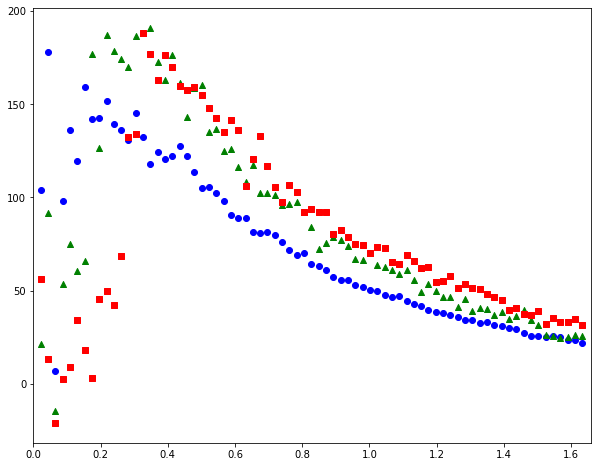

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
# plt.ylim(0, 0.1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/2.2087, marker='o', color='b')
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/2.2087, marker='^', color='g')
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/2.2087, marker='s', color='r')
plt.show()
# fig.savefig("cbi.png")

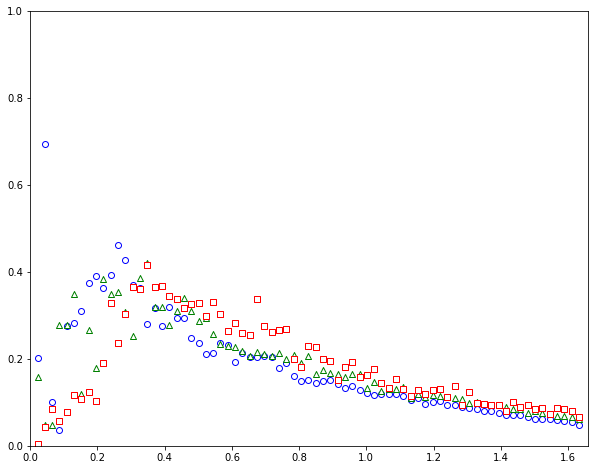

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi.png")

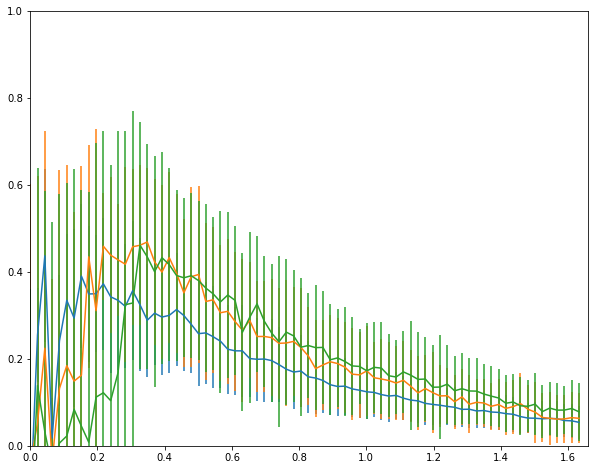

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.errorbar(res[0][:-25, 0]*px2mm/10/H, res[0][:-25, 1]*px2mm*fps/H*T, yerr=res[0][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[1][:-25, 0]*px2mm/10/H, res[1][:-25, 1]*px2mm*fps/H*T, yerr=res[1][:-25, 2]*px2mm*fps/H*T)
ax.errorbar(res[2][:-25, 0]*px2mm/10/H, res[2][:-25, 1]*px2mm*fps/H*T, yerr=res[2][:-25, 2]*px2mm*fps/H*T)
plt.show()

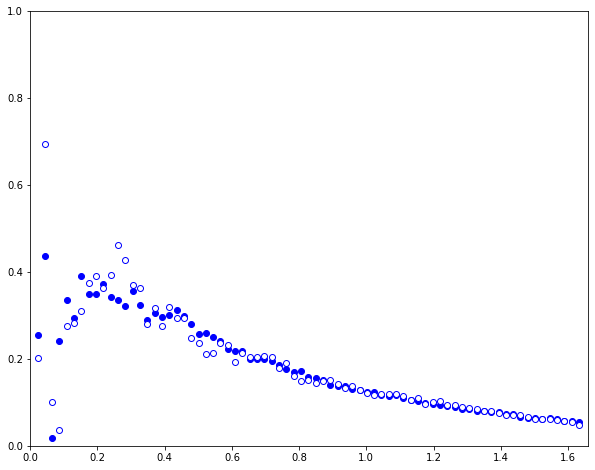

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[0][1:-25, 0]*px2mm/10/H, res[0][1:-25, 1]*px2mm*fps/H*T, marker='o', color='b')
ax.scatter(res[3][1:-25, 0]*px2mm/10/H, res[3][1:-25, 1]*px2mm*fps/H*T, marker='o', color='w', edgecolors='b')
plt.show()
# fig.savefig("rbi_10.png")

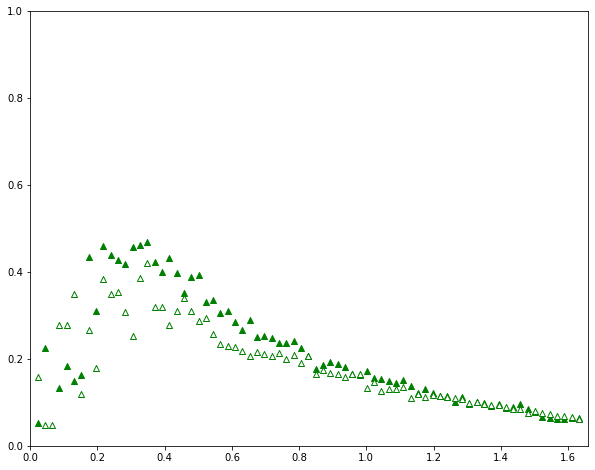

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[1][1:-25, 0]*px2mm/10/H, res[1][1:-25, 1]*px2mm*fps/H*T, marker='^', color='g')
ax.scatter(res[5][1:-25, 0]*px2mm/10/H, res[5][1:-25, 1]*px2mm*fps/H*T, marker='^', color='w', edgecolors='g')
plt.show()
# fig.savefig("rbi_20.png")

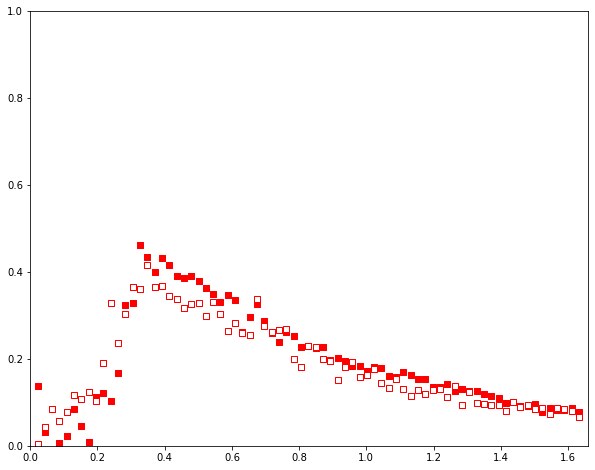

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(0, 1.66)
plt.ylim(0, 1)
ax.scatter(res[2][1:-25, 0]*px2mm/10/H, res[2][1:-25, 1]*px2mm*fps/H*T, marker='s', color='r')
ax.scatter(res[7][1:-25, 0]*px2mm/10/H, res[7][1:-25, 1]*px2mm*fps/H*T, marker='s', color='w', edgecolors='r')
plt.show()
# fig.savefig("rbi_30.png")